In [84]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings as wr
wr.filterwarnings('ignore')

In [85]:
# Load the training & testing datasets
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

# Data Exploration

## Core Data fields
#### Id - a unique identifier for each row.
#### Target - the target is an ordinal variable indicating groups of income levels.

#### 1 = extreme poverty
#### 2 = moderate poverty
#### 3 = vulnerable households
#### 4 = non vulnerable households

#### idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
#### parentesco1 - indicates if this person is the head of the household.

In [86]:
# view first 5 records of the training data
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [87]:
# view first 5 records of the testing data
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [88]:
# see the no. of rows & columns for both training & testing datasets
print('Shape of train dataset is {}'.format(df_train.shape))
print('Shape of test dataset is {}'.format(df_test.shape))

Shape of train dataset is (9557, 143)
Shape of test dataset is (23856, 142)


## Identify the output variable

In [89]:
for i in df_train.columns:
    if i not in df_test.columns:
        print("Our target variable is {}".format(i))

Our target variable is Target


## Understand the type of data

In [90]:
print(df_train.dtypes.value_counts())

int64      130
float64      8
object       5
dtype: int64


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [92]:
# find the columns with object datatype
for i in df_train.columns:
    a=df_train[i].dtype
    if a == 'object':
        print(i)

Id
idhogar
dependency
edjefe
edjefa


# Data Cleaning

In [93]:
# Let's fix first the column with mixed value:
# dependency---> Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
# edjefe= years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
# edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
# For these three variables, it seems “yes” = 1 and “no” = 0. We can correct the variables using a mapping and convert to floats.

In [94]:
# count the values in dependency column
df_train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
.80000001      18
3.5            18
2.25           13
.71428573      12
.22222222      11
1.2            11
1.75           11
.83333331      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [95]:
# replace object values 'yes' & 'no' with 1 & 0
df_train[['dependency','edjefe','edjefa']]=df_train[['dependency','edjefe',
                                                   'edjefa']].replace({'yes':1,'no':0})
df_test[['dependency','edjefe','edjefa']]=df_test[['dependency','edjefe',
                                                   'edjefa']].replace({'yes':1,'no':0})

In [96]:
# view 5 records of 'dependency','edjefe','edjefa' columns
df_train[['dependency','edjefe','edjefa']].head()

,dependency,edjefe,edjefa
0,0,10,0
1,8,12,0
2,8,0,11
3,1,11,0
4,1,11,0


## Count how many null values are existing in columns.

In [97]:
# find the no. of columns where the null values exist
df_train.isna().sum().value_counts()

0       138
5         2
7342      1
6860      1
7928      1
dtype: int64

##### Interpretation : No null values in 138 columns, 5 null values in 2 columns & majority of the null values are present in 3 columns

In [98]:
# find the 5 columns where the null values exist
for i in df_train.columns:
    n= df_train[i].isna().sum()
    if n>0:
        print(i,n)

v2a1 6860
v18q1 7342
rez_esc 7928
meaneduc 5
SQBmeaned 5


### According to the documentation for these columns:

##### v2a1 (total nulls: 6860) : Monthly rent payment
##### v18q1 (total nulls: 7342) : number of tablets household owns
##### rez_esc (total nulls: 7928) : Years behind in school
##### meaneduc (total nulls: 5) : average years of education for adults (18+)
##### SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142

In [99]:
# Let's look at v2a1 (total nulls: 6860) : Monthly rent payment
# why the null values, Lets look at few rows with nulls in v2a1:
# Columns related to Monthly rent payment
# tipovivi1, =1 own and fully paid house
# tipovivi2, "=1 own, paying in installments"
# tipovivi3, =1 rented
# tipovivi4, =1 precarious
# tipovivi5, "=1 other(assigned, borrowed)"
data = df_train[df_train['v2a1'].isnull()].head()

columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


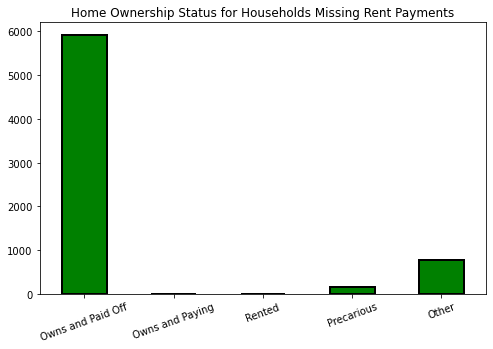

In [100]:
# Variables indicating home ownership
own_variables = [x for x in df_train if x.startswith('tipo')]

# Plot of the home ownership variables for home missing rent payments
df_train.loc[df_train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (8,5),
                                            color = 'green',edgecolor = 'k', linewidth = 2)

plt.xticks([0, 1, 2, 3, 4],['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], 
           rotation = 20)

plt.title('Home Ownership Status for Households Missing Rent Payments', size = 12)
plt.show()

##### Interpretation : Looking at the above data it makes sense that when the house is fully paid, there will be no monthly rent payment.

In [101]:
# Let's add 0 for all the null values
for df in [df_train, df_test]:
    df['v2a1'].fillna(value=0, inplace=True)
df_train[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [102]:
# Let's look at v18q1 (total nulls: 7342) : number of tablets household owns

# why the null values, Lets look at few rows with nulls in v18q1
# Columns related to number of tablets household owns v18q, owns a tablet

# Since this is a household variable, it only makes sense to look at it on a household level, 
# so we'll only select the rows for the head of household.
# Heads of household
heads = df_train.loc[df_train['parentesco1'] == 1].copy()
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

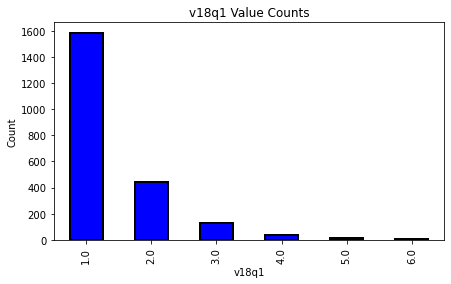

In [103]:
plt.figure(figsize = (7, 4))
col='v18q1'
df_train[col].value_counts().sort_index().plot.bar(color = 'blue',edgecolor = 'k', linewidth = 2)
plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
plt.show()


##### Interpretation : Looking at the above data it makes sense that when owns a tablet column is 0, there will be no number of tablets household owns. 

In [104]:
# Let's add 0 for all the null values.
for df in [df_train, df_test]:
    df['v18q1'].fillna(value=0, inplace=True)
df_train[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

In [105]:
# Let's look at rez_esc (total nulls: 7928) : Years behind in school
# why the null values, Lets look at few rows with nulls in rez_esc
# Columns related to Years behind in school
# Age in years
# Lets look at the data with not null values first.
df_train[df_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

##### Interpretation : From the above , we see that when min age is 7 and max age is 17 for Years, then the 'behind in school' column has a value.

In [106]:
# Lets confirm
df_train.loc[df_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [107]:
df_train.loc[(df_train['rez_esc'].isnull() & 
                     ((df_train['age'] > 7) & (df_train['age'] < 17)))]['age'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

#####  Interpretation : There is one value that has Null for the 'behind in school' column with age between 7 and 17 

In [108]:
df_train[(df_train['age'] ==10) & df_train['rez_esc'].isnull()].head()
df_train[(df_train['Id'] =='ID_f012e4242')].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


##### Interpretation :  there is only one member in household for the member with age 10 and who is 'behind in school'. This explains why the member is behind in school.

In [109]:
#from above we see that  the 'behind in school' column has null values 
# Lets use the above to fix the data
for df in [df_train, df_test]:
    df['rez_esc'].fillna(value=0, inplace=True)
df_train[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

In [110]:
# Lets look at meaneduc (total nulls: 5) : average years of education for adults (18+)
# why the null values, Lets look at few rows with nulls in meaneduc
# Columns related to average years of education for adults (18+)
# edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
# head of household and gender, yes=1 and no=0
# edjefa, years of education of female head of household, based on the interaction of escolari (years of education),
# head of household and gender, yes=1 and no=0
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary

In [111]:
data = df_train[df_train['meaneduc'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,instlevel1,instlevel2
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [112]:
#from the above, we find that meaneduc is null when no level of education is 0
#Lets fix the data
for df in [df_train, df_test]:
    df['meaneduc'].fillna(value=0, inplace=True)
df_train[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

In [113]:
# Lets look at SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142
# why the null values, Lets look at few rows with nulls in SQBmeaned
# Columns related to average years of education for adults (18+)
# edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
# head of household and gender, yes=1 and no=0
# edjefa, years of education of female head of household, based on the interaction of escolari (years of education),
# head of household and gender, yes=1 and no=0
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary

In [114]:
data = df_train[df_train['SQBmeaned'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,instlevel1,instlevel2
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [115]:
#from the above, we find that SQBmeaned is null when no level of education is 0
#Lets fix the data
for df in [df_train, df_test]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
df_train[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [116]:
#Lets look at the overall data to check is there any null values present
null_counts = df_train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

## Check if there is a house without a family head.

In [117]:
# Groupby the household and figure out the number of unique values
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [118]:
#Lets check one household
df_train[df_train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [119]:
#Let's use Target value of the parent record (head of the household) and update rest. 
# But before that lets check if all families has a head. 

households_head = df_train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = df_train.loc[df_train['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [120]:
# Find households without a head and where Target value are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different Target value.


## Set poverty level of the members and the head of the house within a family.

In [121]:
#Lets fix the data
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(df_train[(df_train['idhogar'] == household) & (df_train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    df_train.loc[df_train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

## Check whether all members of the house have the same poverty level.

In [122]:
# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


## Check if there are any biases in your dataset.

In [123]:
# Lets look at the dataset and plot head of household and Target
# 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households 
target_counts = heads['Target'].value_counts().sort_index()
target_counts

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

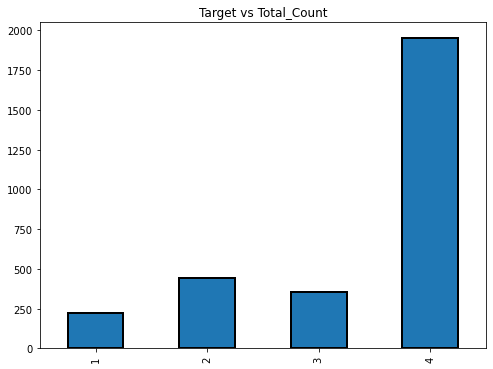

In [124]:
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")
plt.show()

##### Interpretation : Extreme poverty is the smallest count in the train dataset. The dataset is biased.



In [125]:
# # Lets look at the Squared Variables
# ‘SQBescolari’
# ‘SQBage’
# ‘SQBhogar_total’
# ‘SQBedjefe’
# ‘SQBhogar_nin’
# ‘SQBovercrowding’
# ‘SQBdependency’
# ‘SQBmeaned’
# ‘agesq’

In [126]:
#Lets remove them
print(df_train.shape)
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']


for df in [df_train, df_test]:
    df.drop(columns = cols,inplace=True)

print(df_train.shape)

(9557, 143)
(9557, 134)


In [127]:
# Lets identify variable with 0 variance
var_df=pd.DataFrame(np.var(df_train,0),columns=['variance'])
var_df.sort_values(by='variance').head(15)
col=list((var_df[var_df['variance']==0]).index)
print('Columns with 0 variance are',col)

Columns with 0 variance are ['elimbasu5']


##### Interpretation : From above it is shown that all values of elimbasu5 is same so there is no variablity in dataset therefor we will drop this variable

In [128]:
# There are several variables here having to do with the size of the house:
# r4t3, Total persons in the household
# tamhog, size of the household
# tamviv, number of persons living in the household
# hhsize, household size
# hogar_total, # of total individuals in the household
# These variables are all highly correlated with one another.
# tipovivi3, =1 rented is related to v2a1, Monthly rent payment
# v18q owns a tablet is related with v18q1, number of tablets household owns
# elimbasu5 is the 0 variance column & needs to be dropped 
# Finally lets delete Id = Unique ID, idhogar, Household level identifier 

In [129]:
cols=['tamhog', 'hogar_total', 'r4t3','tamviv','hhsize','tipovivi3','v18q','elimbasu5','Id','idhogar']
for df in [df_train, df_test]:
    df.drop(columns = cols,inplace=True)

df_train.shape

(9557, 124)

In [130]:
# check total no of rows & columns of the dataset
df_train.shape

(9557, 124)

In [131]:
# check the values of target variable
df_train.Target.value_counts()

4    6004
2    1558
3    1221
1     774
Name: Target, dtype: int64

## Remove null value rows of the target variable.

In [132]:
# Lets Identify number of null values in Target variable
df_train['Target'].isna().sum()

0

###### Interpretation : There are no null values in Target variable

In [133]:
#lets check area1 and area2 also
# area1, =1 zona urbana 
# area2, =2 zona rural 
#area2 redundant because we have a column indicating if the house is in a urban zone

for df in [df_train, df_test]:
    df.drop(columns = 'area2',inplace=True)

df_train.shape

(9557, 123)

In [134]:
# For people below poverty level can be people paying less rent and don't own a house
# The poverty level also depends on whether a house is in urban area or rural area
rented=df_train[df_train['v2a1']!=0]

In [135]:
rented.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,Target
0,190000.0,0,3,0,1,1,0.0,0,1,1,...,1,1,0,0,0,0,0,1,43,4
1,135000.0,0,4,0,1,1,1.0,0,1,1,...,1,1,0,0,0,0,0,1,67,4
3,180000.0,0,5,0,1,1,1.0,0,2,2,...,3,1,0,0,0,0,0,1,17,4
4,180000.0,0,5,0,1,1,1.0,0,2,2,...,3,1,0,0,0,0,0,1,37,4
5,180000.0,0,5,0,1,1,1.0,0,2,2,...,3,1,0,0,0,0,0,1,38,4


In [136]:
rented.shape

(2668, 123)

In [137]:
# area1=1 implies urban zoned area
rented['area1'].value_counts()

1    2223
0     445
Name: area1, dtype: int64

In [138]:
# find average rent in urban area
avg_rent=rented.groupby('area1')['v2a1'].apply(np.median)

In [139]:
avg_rent

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

###### Interpretation: For rural area level if people paying rent less than 8000 is under poverty level.For Urban area level if people paying rent less than 140000 is under poverty level.

In [140]:
# make a function to determine the poverty level of urban area according to average rent

def poverty(x):
    if x<8000:
        return('Below poverty level : For Rural area level')

    elif x>140000:
        return('Above poverty level : For Urban area level')
    
    elif x<140000:
        return('Below poverty level:For Urban area level & Above poverty level:For Rural area level')
    
    else:
        return('Below poverty level : For Urban area level')

In [141]:
poverty_level=rented['v2a1'].apply(poverty)

In [142]:
poverty_level.shape

(2668,)

In [143]:
# view poverty level of the people paying rent in urban area
pd.crosstab(poverty_level,rented['area1'])

area1,0,1
v2a1,,
Above poverty level : For Urban area level,139,1103
Below poverty level : For Urban area level,0,39
Below poverty level:For Urban area level & Above poverty level:For Rural area level,306,1081


In [144]:
# view records where rural people not paying rent or paying rent below 8000
rural_poverty=df_train[(df_train['v2a1']>=0)&(df_train['v2a1']<=8000)]

# print the no. of rural people below poverty level
print('Below poverty level : For Rural area level',rural_poverty.shape[0])

Below poverty level : For Rural area level 6889


##### Interpretation : 
##### There are total 1242 people above poverty level independent of area whether Rural or Urban 
##### There are 39 people below poverty level independent of area whether Rural or Urban
##### The poverty level of 1387 people  depends on their area whether Rural or Urban
##### Rural : Above poverty level= 445,  Below poverty level=6889
##### Urban : Above poverty level =1103, Below poverty level=1120

In [145]:
x_features=df_train.drop('Target',axis=1)
y_target=df_train['Target']

In [146]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_features,y_target,test_size=0.2,random_state=1)

In [147]:
# Applying Standard Scaling to dataset
from sklearn.preprocessing import StandardScaler

In [148]:
# instantiate the scaling object
scaler=StandardScaler()

In [149]:
# scaling both training & testing datasets
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

## Predict the accuracy using random forest classifier.

In [150]:
# Model fitting
from sklearn.ensemble import RandomForestClassifier

In [151]:
# instantiate the model object
RFC=RandomForestClassifier()

In [152]:
# fitting the model
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [153]:
# predict training set with the model
y_train_pred_rf=RFC.predict(x_train)

In [154]:
# predict testing set with the model
y_test_pred_rf=RFC.predict(x_test)

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [156]:
# check the accuracy of the training set
acc_train_rf=accuracy_score(y_train_pred_rf,y_train)
acc_train_rf

1.0

In [157]:
# check the accuracy of the testing set
acc_test_rf=accuracy_score(y_test_pred_rf,y_test)
acc_test_rf

0.9450836820083682

In [158]:
# confusion matrix of the training set
cm_train_rf=confusion_matrix(y_train_pred_rf,y_train)
cm_train_rf

array([[ 617,    0,    0,    0],
       [   0, 1241,    0,    0],
       [   0,    0,  988,    0],
       [   0,    0,    0, 4799]], dtype=int64)

In [159]:
# confusion matrix of the testing set
cm_test_rf=confusion_matrix(y_test_pred_rf,y_test)
cm_test_rf

array([[ 132,    1,    0,    0],
       [   0,  284,    1,    2],
       [   0,    1,  189,    1],
       [  25,   31,   43, 1202]], dtype=int64)

In [160]:
# predict the Test dataset with the model
y_predict_testdata = RFC.predict(df_test)

In [161]:
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

## Check the accuracy using random forest with cross validation.

In [162]:
from sklearn.model_selection import KFold,cross_val_score

In [163]:
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

RFC=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(RFC,x_features,y_target,cv=kfold,scoring='accuracy'))
results=cross_val_score(RFC,x_features,y_target,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.93828452 0.94612971 0.93825222 0.93511251 0.94243851]
94.0043494063219


In [164]:
# check which features are most important
RFC.fit(x_features,y_target)
labels = list(x_features)
feature_importances = pd.DataFrame({'Feature': labels, 'Importance': RFC.feature_importances_})
feature_importances=feature_importances[feature_importances.Importance>0.015]
feature_importances.head()

,Feature,Importance
0,v2a1,0.020923
2,rooms,0.026361
8,r4h2,0.021916
9,r4h3,0.021138
10,r4m1,0.016168


In [165]:
# predict the test dataset
y_predict_testdata = RFC.predict(df_test)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

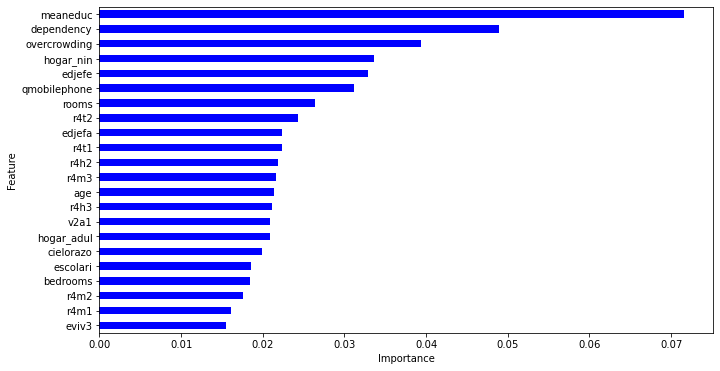

In [166]:
feature_importances.sort_values(by=['Importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['Importance'] > 0
feature_importances.set_index('Feature',inplace=True)
feature_importances.head()

feature_importances.Importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

##### Interpretation : From the above figure, we can state : meaneduc, dependency, overcrowding columns have significant influence on the Model & it gives 94% accurate prediction using Random Forest with Cross Validation.

#                                         ----THE END ----